In [1]:
from pandas import DataFrame
import pandas as pd

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time

In [3]:
n = 4
A = np.random.rand(n,n)
A_inv = np.linalg.inv(A)

u = np.random.rand(n,1)
v = np.random.rand(n,1)

In [4]:
def numpy_version(A, u, v):
    return np.linalg.inv(A + u @ v.T)

In [5]:
def sherman_morrison(A_inv, u, v):
    return A_inv - (A_inv @ u @ v.T @ A_inv) / (1 + (v.T @ A_inv) @ u)

In [6]:
def sherman_morrison_modified(A_inv, u, v):
    return A_inv - (A_inv @ (u @ v.T) @ A_inv) / (1 + (v.T @ A_inv) @ u)

In [7]:
# numpy_version(A, u, v)

In [8]:
# sherman_morrison(A, u, v)

In [9]:
# sherman_morrison_modified(A, u, v)

In [10]:
def run_test(n, amount_of_tests = 10):
    times = [[],[],[]]
    for i in range(amount_of_tests):
        A = np.random.rand(n,n)
        A_inv = np.linalg.inv(A)

        u = np.random.rand(n,1)
        v = np.random.rand(n,1)

        t = time()
        numpy_version(A, u, v)
        times[0].append(time() - t) 
        
        A_inv = np.linalg.inv(A)
        
        t = time()
        sherman_morrison(A_inv, u ,v)
        times[1].append(time() - t) 

        t = time()
        sherman_morrison_modified(A_inv, u, v)
        times[2].append(time() - t) 
    
        
    return times

In [11]:
# run_test(100)

In [18]:
def run_tests(start = 25, step = 25, k = 75, amount = 10):
    times = []
    amounts = []
    n = start
    for i in range(k):
        times.append(run_test(n, amount))
        amounts.append(n)
        n += step
    return times, amounts

In [19]:
n = 35

start = 50
end = 1500

step = int((end - start)/n)


r, am = run_tests(start, step, n)

In [20]:
nump, sh1, sh2 = [], [], []
for i in range(len(r)):
    nump.append(r[i][0])
    sh1.append(r[i][1])
    sh2.append(r[i][2])

In [44]:
def to_dataframe(data):
    df = DataFrame(data = data, index=am, columns = [i for i in range(10)])
    df['std'] = df.T.std()
    df['mean'] = df.T.mean()
    
    return df
nump_df = to_dataframe(nump)
sh1_df = to_dataframe(sh1)
sh2_df = to_dataframe(sh2)

In [45]:
# df.plot(y = 'mean', yerr = 'std')
nump_df

,0,1,2,3,4,5,6,7,8,9,std,mean
50,0.000139,0.000083,0.000085,0.000090,0.000147,0.000086,0.000085,0.000088,0.000136,0.000084,0.000027,0.000095
91,0.000250,0.000285,0.001142,0.000309,0.000296,0.000166,0.000167,0.000167,0.000173,0.000163,0.000298,0.000310
132,0.002350,0.000300,0.000286,0.000284,0.000295,0.000283,0.000441,0.000390,0.000290,0.000313,0.000644,0.000534
173,0.000500,0.000502,0.000857,0.000668,0.000485,0.000489,0.000891,0.000736,0.000834,0.000813,0.000170,0.000631
214,0.001039,0.001006,0.000855,0.000999,0.000723,0.001097,0.001194,0.000926,0.000704,0.000716,0.000172,0.000857
255,0.001524,0.001924,0.009139,0.001523,0.001104,0.001488,0.001113,0.001263,0.001389,0.001672,0.002446,0.002235
296,0.002170,0.002133,0.002286,0.002279,0.002699,0.001569,0.002202,0.001580,0.001997,0.001792,0.000348,0.001914
337,0.002479,0.003288,0.002787,0.002629,0.003386,0.002043,0.002190,0.002333,0.002534,0.003229,0.000473,0.002488
378,0.004074,0.003686,0.003752,0.003764,0.003310,0.003882,0.004098,0.006923,0.004207,0.003177,0.001049,0.003811
419,0.004961,0.004205,0.003852,0.003645,0.005035,0.003506,0.003408,0.004872,0.003593,0.004030,0.000631,0.003794


<AxesSubplot:>

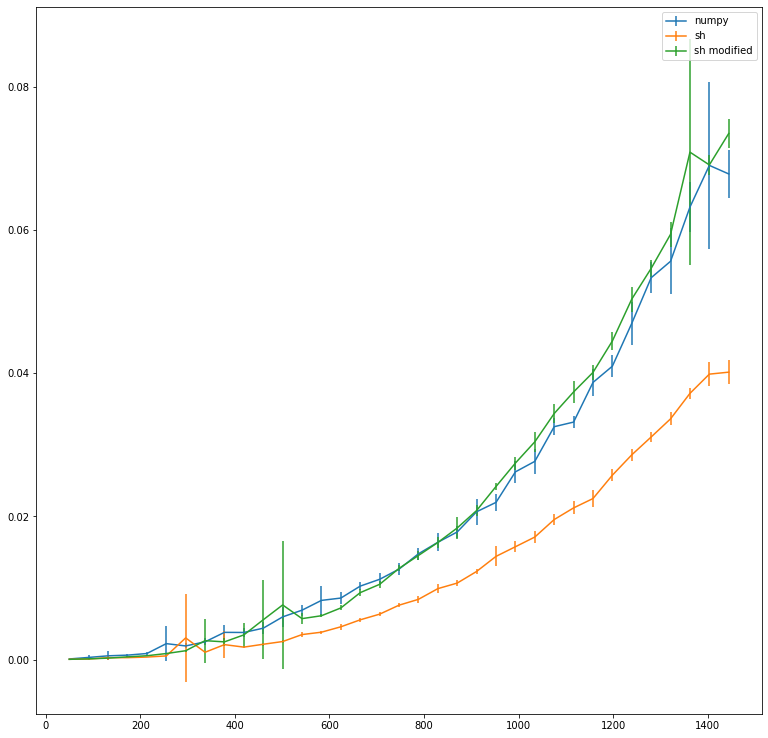

In [46]:
fig , ax = plt.subplots(figsize = (13,13))

nump_df.plot(ax = ax,y = 'mean', yerr = 'std', label = 'numpy')
sh1_df.plot(ax = ax, y = 'mean', yerr = 'std', label = 'sh')
sh2_df.plot(ax = ax, y = 'mean', yerr = 'std', label = 'sh modified')

<AxesSubplot:>

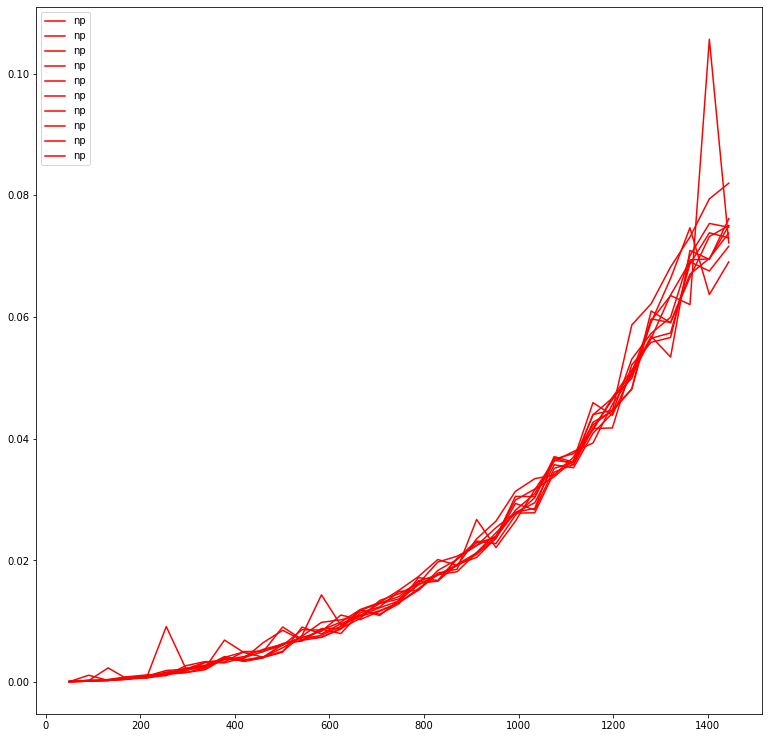

In [51]:
fig , ax = plt.subplots(figsize = (13,13))

nump_df.plot(ax = ax, y = [i for i in range(10)], label = ['np'] *10, color = 'r')
# sh1_df.plot(ax = ax,  label = 'sh')
# sh2_df.plot(ax = ax,  label = 'sh modified')